In [24]:
import pandas as pd
import pyecharts
import requests
import json
import time
import pandas as pd
import random
from pyecharts import options as opts
from pyecharts.charts import Pie,Bar
from example.commons import Faker
from pyecharts.globals import ThemeType
# 只需要在顶部声明 CurrentConfig.ONLINE_HOST 即可
from pyecharts.globals import CurrentConfig,NotebookType
CurrentConfig.NOTEBOOK_TYPE=NotebookType.JUPYTER_NOTEBOOK

ModuleNotFoundError: No module named 'example.commons'

In [1]:



def fetchURL(url):
    headers = {

        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',

        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36',

    }

    try:

        r = requests.get(url, headers=headers)

        r.raise_for_status()

        print(r.url)

        return r.text

    except requests.HTTPError as e:

        print(e)

        print("HTTPError")

    except requests.RequestException as e:

        print(e)

    except:

        print("Unknown Error !")


def parserHtml(html):
    try:

        s = json.loads(html)

    except:

        print('error')

    commentlist = []

    hlist = []

    hlist.append("序号")

    hlist.append("名字")

    hlist.append("性别")

    hlist.append("时间")

    hlist.append("评论")

    hlist.append("点赞数")

    hlist.append("回复数")

    # commentlist.append(hlist)

    # 楼层，用户名，性别，时间，评价，点赞数，回复数

    for i in range(20):  # range(a)中的a指每一页取前a条评论，b站标准20条所以填20。如果填1就会每一页取第一条，见test1。

        comment = s['data']['replies'][i]

        blist = []

        # 这个comment信息量相当大，基本上能搞到评论者个人主页上的所有信息，比如下面还可用comment['member']['sign']拿到签名

        # 具体查看可以拿到的数据：F12-network-手动评论区翻页动作-preview-jQuery-data-replies-0(随便开一个)-content(内容)/member(人)

        # floor = comment['floor']

        username = comment['member']['uname']

        sex = comment['member']['sex']

        ctime = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(comment['ctime']))

        content = comment['content']['message']

        likes = comment['like']

        rcounts = comment['rcount']

        signature = comment['member']['sign']

        level = comment['member']['level_info']['current_level']

        # blist.append(floor)

        blist.append(username)

        blist.append(sex)

        blist.append(ctime)

        blist.append(content)

        blist.append(likes)

        blist.append(rcounts)

        blist.append(signature)

        blist.append(level)

        commentlist.append(blist)

    writePage(commentlist)

    print('---' * 20)


def writePage(urating):
    dataframe = pd.DataFrame(urating)

    dataframe.to_csv('test3.csv', mode='a', index=False, sep=',', header=False, encoding="utf_8_sig")


# 当然，每次csv应当换名字。追加Office打开的csv会报错。


if __name__ == '__main__':
    e = 0
    page = 1
    while e == 0:
        url = "https://api.bilibili.com/x/v2/reply?pn=" + str(
            page) + "&type=1&oid=501153233&sort=2&_=1609937800830"
        # url = 'https://api.bilibili.com/x/v2/reply?type=1&oid=av501153233&sort=2&_=1609937800830' + str(
        #     page)  # 这里"oid="后面是要爬的av号，我为了数据量这里爬了领风者的
        try:
            html = fetchURL(url)
            print('page:', page)

            parserHtml(html)

            page = page + 1
            if page % 10 == 0:
                time.sleep(5)  # 每爬一页便(假装)歇几秒，怕封IP
        except:
            e = 1



https://api.bilibili.com/x/v2/reply?pn=1&type=1&oid=501153233&sort=2&_=1609937800830
page: 1
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=2&type=1&oid=501153233&sort=2&_=1609937800830
page: 2
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=3&type=1&oid=501153233&sort=2&_=1609937800830
page: 3
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=4&type=1&oid=501153233&sort=2&_=1609937800830
page: 4
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=5&type=1&oid=501153233&sort=2&_=1609937800830
page: 5
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=6&type=1&oid=501153233&sort=2&_=1609937800830
page: 6
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=7&type=1&oid=501153233&sort=2&_=16099

In [26]:
data = pd.read_csv(r"test3.csv")
col = ['uname', 'sex', 'ctime', 'content', 'likes', 'rcounts', 'signature', 'level']
data.columns = col
data.head()

,uname,sex,ctime,content,likes,rcounts,signature,level
0,鸟杰魔方,保密,2021-01-17 18:00:47,冰冰统计助手🔎\n2020年12月31日12:04\n粉丝数：10万\n2020年12月31...,70956,555,魔方你都能解开了，还有什么难题你解不开呢？,6
1,白夜梦想者,保密,2021-01-17 18:03:39,五脊六兽是中国宫殿式建筑，有上脊五条，四角各有兽头六枚。五脊，指大脊（正脊）及四条垂脊。正脊...,18799,194,NaN,5
2,少卿菌,男,2021-01-17 18:01:12,她还是那么喜欢摸鱼[doge],29391,212,2021年，冲起来！ 交流群：375644713 邮箱：shaoqingup@qq.com,6
3,海胆Crush,男,2021-01-17 18:05:31,课代表来了\n1.美\n2.美\n3.美\n4.美\n5.美\n……[热词系列_芜湖起飞],28499,111,“我们一日日度过的所谓日常，实际上可能是连续不断发生的奇迹。”\nhttps://b23.t...,5
4,宝剑嫂,男,2021-01-17 18:00:37,我的心也是冰冰的！,122793,896,努力做人民的好猪猪 【微博@宝剑嫂】,6


In [27]:
data.describe()

,likes,rcounts,level
count,379.000000,379.000000,379.000000
mean,1244.034301,25.168865,4.358839
std,7801.222604,120.426548,1.151486
min,6.000000,0.000000,2.000000
25%,9.000000,1.000000,4.000000
50%,23.000000,3.000000,4.000000
75%,152.000000,10.000000,5.000000
max,122793.000000,1908.000000,6.000000


In [28]:
data.dropna()#删除缺失的数据

,uname,sex,ctime,content,likes,rcounts,signature,level
0,鸟杰魔方,保密,2021-01-17 18:00:47,冰冰统计助手🔎\n2020年12月31日12:04\n粉丝数：10万\n2020年12月31...,70956,555,魔方你都能解开了，还有什么难题你解不开呢？,6
2,少卿菌,男,2021-01-17 18:01:12,她还是那么喜欢摸鱼[doge],29391,212,2021年，冲起来！ 交流群：375644713 邮箱：shaoqingup@qq.com,6
3,海胆Crush,男,2021-01-17 18:05:31,课代表来了\n1.美\n2.美\n3.美\n4.美\n5.美\n……[热词系列_芜湖起飞],28499,111,“我们一日日度过的所谓日常，实际上可能是连续不断发生的奇迹。”\nhttps://b23.t...,5
4,宝剑嫂,男,2021-01-17 18:00:37,我的心也是冰冰的！,122793,896,努力做人民的好猪猪 【微博@宝剑嫂】,6
5,拯救世界的狗子,男,2021-01-17 18:00:59,我！的！心！是！冰！冰！的！（冰冰好高产！我好了又好）[小电视_害羞][小电视_害羞],14923,75,目标50w关注“我想我很值得，当一个歌颂者。” Q音/网易云/微博@拯救世界的狗子 粉丝群...,6
...,...,...,...,...,...,...,...,...
367,无解漫,男,2021-01-18 12:14:25,虎扑搬运这个视频得到冰冰授权了吗？？？？？？,7,2,God knows!,6
371,EricSilica,男,2021-01-18 02:42:38,妈呀看着视频感觉嘴角都不受控制了，还好有耳朵挡着不然要到后脑勺去了,7,1,T大搬砖工,6
373,想吃鱼罐头,保密,2021-01-18 01:18:02,这个吸猫的场所是在哪呀 我好像什么时候去过欸 感觉好眼熟 有大佬知道么,7,0,我的罐头呢,5
374,Nin丶,男,2021-01-18 00:31:19,生活的美好借由冰冰的视角感受，是让我们不仅重拾对生活的捕捉和日子的纯纯的享受，时刻都要好好珍...,7,1,九九九九,5


In [29]:
data.drop_duplicates()#返回删除重复行的数据

,uname,sex,ctime,content,likes,rcounts,signature,level
0,鸟杰魔方,保密,2021-01-17 18:00:47,冰冰统计助手🔎\n2020年12月31日12:04\n粉丝数：10万\n2020年12月31...,70956,555,魔方你都能解开了，还有什么难题你解不开呢？,6
1,白夜梦想者,保密,2021-01-17 18:03:39,五脊六兽是中国宫殿式建筑，有上脊五条，四角各有兽头六枚。五脊，指大脊（正脊）及四条垂脊。正脊...,18799,194,NaN,5
2,少卿菌,男,2021-01-17 18:01:12,她还是那么喜欢摸鱼[doge],29391,212,2021年，冲起来！ 交流群：375644713 邮箱：shaoqingup@qq.com,6
3,海胆Crush,男,2021-01-17 18:05:31,课代表来了\n1.美\n2.美\n3.美\n4.美\n5.美\n……[热词系列_芜湖起飞],28499,111,“我们一日日度过的所谓日常，实际上可能是连续不断发生的奇迹。”\nhttps://b23.t...,5
4,宝剑嫂,男,2021-01-17 18:00:37,我的心也是冰冰的！,122793,896,努力做人民的好猪猪 【微博@宝剑嫂】,6
...,...,...,...,...,...,...,...,...
374,Nin丶,男,2021-01-18 00:31:19,生活的美好借由冰冰的视角感受，是让我们不仅重拾对生活的捕捉和日子的纯纯的享受，时刻都要好好珍...,7,1,九九九九,5
375,流逝抓不住,保密,2021-01-18 00:16:26,冰冰应该是把水印加上去了，所以才会重新刷新数据，第一个视频也这样,7,3,NaN,5
376,麦克默多的浮冰,保密,2021-01-17 23:55:04,都坐下，b站服务器被冰冰搞崩而已，日常操作[OK],7,0,NaN,5
377,b站冰粉,保密,2021-01-17 23:53:40,本来看的好好的，被破站搞这么一出，,7,3,NaN,3


In [30]:
df1 = data.sort_values(by="likes",ascending=False).head(5)#沿着like排序，降序
df1

,uname,sex,ctime,content,likes,rcounts,signature,level
4,宝剑嫂,男,2021-01-17 18:00:37,我的心也是冰冰的！,122793,896,努力做人民的好猪猪 【微博@宝剑嫂】,6
0,鸟杰魔方,保密,2021-01-17 18:00:47,冰冰统计助手🔎\n2020年12月31日12:04\n粉丝数：10万\n2020年12月31...,70956,555,魔方你都能解开了，还有什么难题你解不开呢？,6
2,少卿菌,男,2021-01-17 18:01:12,她还是那么喜欢摸鱼[doge],29391,212,2021年，冲起来！ 交流群：375644713 邮箱：shaoqingup@qq.com,6
3,海胆Crush,男,2021-01-17 18:05:31,课代表来了\n1.美\n2.美\n3.美\n4.美\n5.美\n……[热词系列_芜湖起飞],28499,111,“我们一日日度过的所谓日常，实际上可能是连续不断发生的奇迹。”\nhttps://b23.t...,5
6,无能转圈,女,2021-01-17 18:00:28,那必须,19852,152,游戏区up主，就这区up主，评论区up主,4


In [31]:
df1[df1['level'] >= 5]

,uname,sex,ctime,content,likes,rcounts,signature,level
4,宝剑嫂,男,2021-01-17 18:00:37,我的心也是冰冰的！,122793,896,努力做人民的好猪猪 【微博@宝剑嫂】,6
0,鸟杰魔方,保密,2021-01-17 18:00:47,冰冰统计助手🔎\n2020年12月31日12:04\n粉丝数：10万\n2020年12月31...,70956,555,魔方你都能解开了，还有什么难题你解不开呢？,6
2,少卿菌,男,2021-01-17 18:01:12,她还是那么喜欢摸鱼[doge],29391,212,2021年，冲起来！ 交流群：375644713 邮箱：shaoqingup@qq.com,6
3,海胆Crush,男,2021-01-17 18:05:31,课代表来了\n1.美\n2.美\n3.美\n4.美\n5.美\n……[热词系列_芜湖起飞],28499,111,“我们一日日度过的所谓日常，实际上可能是连续不断发生的奇迹。”\nhttps://b23.t...,5


In [32]:

c1 = (
    Bar()
    .add_xaxis(df1["content"].to_list())
    .add_yaxis("likes", df1["likes"].to_list(), color=Faker.rand_color())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="评论热度Top5"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
    )
    .render_notebook()
)
c1


In [33]:
#进行分组计数，然后按照从大到小的顺序进行排列

df_shuijun = df1[['uname','content']].groupby(by = 'uname').count().sort_values(by = 'content',ascending = False)
df_shuijun

,content
uname,
宝剑嫂,1
少卿菌,1
无能转圈,1
海胆Crush,1
鸟杰魔方,1


In [34]:
#进行分组计数，然后按照从大到小的顺序进行排列
len(df_shuijun[df_shuijun['content'] >= 10])

0

In [35]:

#查看一下动态超过10条的数据量，也就是下面61的依据

shuijun_data_over_10 = df_shuijun.iloc[:61]
shuijun_data_over_10

,content
uname,
宝剑嫂,1
少卿菌,1
无能转圈,1
海胆Crush,1
鸟杰魔方,1


In [36]:

x = shuijun_data_over_10.index.tolist()
y = shuijun_data_over_10['content'].tolist()
print(x,y)

['宝剑嫂', '少卿菌', '无能转圈', '海胆Crush', '鸟杰魔方'] [1, 1, 1, 1, 1]


In [37]:

c2 = (
    Pie()
    .add(
        "",
        [list(z) for z in zip([str(i) for i in range(1,6)], [63,138,312,502,165])],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="等级分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
)
c2



In [38]:
# 评论里有键盘侠或者水军吗？

df_shuijun = df1[['uname','content']].groupby(by = 'uname').count().sort_values(by = 'content',ascending = False)
#进行分组计数，然后按照从大到小的顺序进行排列

#查看一下动态超过10条的数据量，也就是下面61的依据

shuijun_data_over_10 = df_shuijun.iloc[:61]
x = shuijun_data_over_10.index.tolist()
y = shuijun_data_over_10['content'].tolist()
#设置x，y数据
from pyecharts import options as opts
from pyecharts.charts import Bar
from example.commons import Faker

c3=(
    Bar()
    .add_xaxis(x)
    .add_yaxis('content',y,color=Faker.rand_color())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="水军数据排行榜"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")]
    )
    .render_notebook()

)
c3

ModuleNotFoundError: No module named 'example.commons'

In [20]:
#在jupyter notebook里使用
import pandas as pd

data = pd.read_csv(r"test3.csv")
col = ['uname', 'sex', 'ctime', 'content', 'likes', 'rcounts', 'signature', 'level']
data.columns = col
data.head()

#-----------------------------------
data.describe()
#-----------------------------------
data.dropna()
#-----------------------------------
data.drop_duplicates()
#-----------------------------------
df1 = data.sort_values(by="likes",ascending=False).head(5)
#-----------------------------------
df1[df1['level'] >= 5]
#-----------------------------------
from pyecharts.globals import ThemeType
# 只需要在顶部声明 CurrentConfig.ONLINE_HOST 即可
from pyecharts.globals import CurrentConfig, OnlineHostType

# OnlineHostType.NOTEBOOK_HOST 默认值为 http://localhost:8888/nbextensions/assets/
CurrentConfig.ONLINE_HOST = OnlineHostType.NOTEBOOK_HOST

# # 接下来所有图形的静态资源文件都会来自刚启动的服务器
# from pyecharts.charts import Bar
# bar = Bar()

#-----------------------------------
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker
#-----------------------------------
c1 = (
    Bar()
    .add_xaxis(df1["content"].to_list())
    .add_yaxis("likes", df1["likes"].to_list(), color=Faker.rand_color())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="评论热度Top5"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
    )
    .render_notebook()
)
c1

#-----------------------------------
from wordcloud import WordCloud
import jieba
from tkinter import _flatten
from matplotlib.pyplot import imread
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
with open('cn_stopwords.txt', 'r', encoding='utf-8') as f:
    stopWords = f.read()
with open('hit_stopwords.txt','r',encoding='utf-8') as t:
    stopWord = t.read()
total = stopWord.split() + stopWords.split()
def my_word_cloud(data=None, stopWords=None, img=None):
    dataCut = data.apply(jieba.lcut)  # 分词
    dataAfter = dataCut.apply(lambda x: [i for i in x if i not in stopWords])  # 去除停用词
    wordFre = pd.Series(_flatten(list(dataAfter))).value_counts()  # 统计词频
    mask = plt.imread(img)
    plt.figure(figsize=(20,20))
    wc  = WordCloud(scale=10,font_path='C:/Windows/Fonts/STXINGKA.TTF',mask=mask,background_color='black',)
    wc.fit_words(wordFre)
    wc.to_file('x.png')
    plt.imshow(wc)
    plt.axis('off')
my_word_cloud(data=data["content"],stopWords=stopWords,img="1.jpg")

#-----------------------------------
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c2 = (
    Pie()
    .add(
        "",
        [list(z) for z in zip([str(i) for i in range(2,7)], [63,138,312,502,165])],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="等级分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render()
)
c2

#-----------------------------------
# 评论里有键盘侠或者水军吗？

df_shuijun = df1[['uname','content']].groupby(by = 'uname').count().sort_values(by = 'content',ascending = False)
#进行分组计数，然后按照从大到小的顺序进行排列
#df[df['uname'].str.contains('华洛丽桑卓')]
#这个是用来查找包含某个内容的原始数据
len(df_shuijun[df_shuijun['content'] >= 10])
#查看一下动态超过10条的数据量，也就是下面61的依据

shuijun_data_over_10 = df_shuijun.iloc[:61]
x = shuijun_data_over_10.index.tolist()
y = shuijun_data_over_10['content'].tolist()
#设置x，y数据
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

bar=Bar()

bar.add_xaxis(x)
bar.add_yaxis("content",y, color=Faker.rand_color())
bar.set_global_opts(
        title_opts=opts.TitleOpts(title="水军数据排行榜"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],)
bar.set_series_opts('动态数据大于10条的排名信息', x, y, is_datazoom_show = True, 
        datazoom_range = [0,100], mark_line=[ "average"], 
        tooltip_axispointer_type = 'cross')
bar.render('render4.html')


ModuleNotFoundError: No module named 'jieba'

In [3]:
! pip install pandas


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
! pip install requests

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple

You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
! pip install random

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
! pip install time

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time
You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
!pip install --upgrade pip
%time !pip install msgpack


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/54/eb/4a3642e971f404d69d4f6fa3885559d67562801b99d7592487f1ecc4e017/pip-20.3.3-py2.py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 拒绝访问。: 'C:\\Users\\CDY\\AppData\\Local\\Temp\\pip-uninstall-l03hv8kx\\pip.exe'
Consider using the `--user` option or check the permissions.



Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Wall time: 1.56 s


In [8]:
!pip install --upgrade pip

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [9]:
! pip install pandas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [10]:
! pip install time

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


ERROR: Could not find a version that satisfies the requirement time
ERROR: No matching distribution found for time


In [11]:
! pip install requests

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [13]:
! pip install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [15]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt
import numpy as np

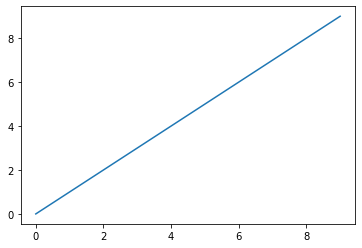

In [17]:
# 开始画图
x = np.arange(10)
y = x
plt.plot(x,y)

In [19]:
! pip install pyecharts

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/d2/1a/a094c0d11c3c87cf407cbd9dc069882e9bba08374df1ad81dfb39de1a8d3/pyecharts-1.9.0-py3-none-any.whl (135 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/94/d5/52e48f3bcf66f838d411ad85c3ac9550c2451d082623e2d4d4df7411ed5c/prettytable-2.0.0-py3-none-any.whl (22 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/49/45/a16db4f0fa383aaf0676fb7e3c660304fe390415c243f41a77c7f917d59b/simplejson-3.17.2.tar.gz (83 kB)
  Created wheel for simplejson: filename=simplejson-3.17.2-cp38-cp38-win_amd64.whl size=74084 sha256=16c6ea5e9e0f8579511a15914880afead4c11fdc877c00fa57690381d0974163
  Stored in directory: c:\users\cdy\appdata\local\pip\cache\wheels\b6\9e\7b\d770b86ff004cdd6ed225b05b798a1e288f3993a7c5b6e2a81
Successfully built simplejson


In [22]:
! pip install Faker

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [23]:
! pip install example

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Created wheel for example: filename=example-0.1.0-py3-none-any.whl size=1243 sha256=646cb2903ce690be9480892ea6080e2e8fe67b9ed3392a5395870bdc88f4ec2c
  Stored in directory: c:\users\cdy\appdata\local\pip\cache\wheels\14\88\b4\e19c94ecaba6945f4eb04726cc6805f4dd9779a999c639d5ab
Successfully built example
